<a href="https://colab.research.google.com/github/nishamathi/MachineLearningJourney/blob/main/MLJdphiAss1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
!pip install --upgrade scikit-learn==0.22.2

Requirement already up-to-date: scikit-learn==0.22.2 in /usr/local/lib/python3.6/dist-packages (0.22.2)


In [97]:
!pip install imblearn

In [98]:
!pip install six

In [99]:
pip show imblearn

Name: imblearn
Version: 0.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://pypi.python.org/pypi/imbalanced-learn/
Author: UNKNOWN
Author-email: UNKNOWN
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: imbalanced-learn
Required-by: 


In [100]:
pip show scikit-learn

Name: scikit-learn
Version: 0.22.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, joblib, numpy
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute


In [101]:
import pandas as pd
import numpy as np
insurance_data = pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")

In [102]:
#%%# To find dtypes of all columns
print(insurance_data.dtypes)
# Check missing values
print(insurance_data.isnull().sum())
# Check if negative values are present in int and float dtypes
bool=insurance_data['Age']<0
print('Age Neg value',bool.sum())

bool=insurance_data['Claim']<0
print('Claim Neg value',bool.sum())

bool=insurance_data['Duration']<0
print('Duration Neg value',bool.sum())

bool=insurance_data['Net Sales']<0
print('Net Sales Neg value',bool.sum())

bool=insurance_data['Commision (in value)']<0
print('Commision in value Neg value',bool.sum())

gen=insurance_data['Gender'].value_counts()
print(gen)

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
Claim                     int64
dtype: object
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64
Age Neg value 0
Claim Neg value 0
Duration Neg value 3
Net Sales Neg value 522
Commision in value Neg value 0
M    7137
F    6762
Name: Gender, dtype: int64


Mean of duration 49.5466017405719
Median of duration 22.0
Min of duration -2
Max of duration 4881


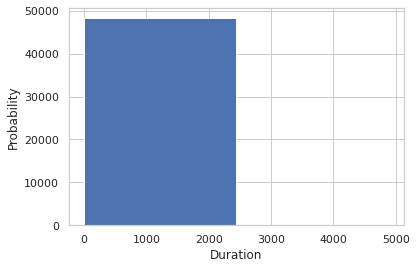

In [103]:
print('Mean of duration', np.mean(insurance_data['Duration']))
print('Median of duration', np.median(insurance_data['Duration']))
print('Min of duration', np.min(insurance_data['Duration']))
print('Max of duration', np.max(insurance_data['Duration']))
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(insurance_data['Duration'], density=False, bins=2)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Duration');


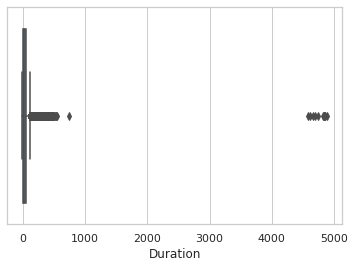

In [104]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=insurance_data["Duration"])

In [105]:
insurance_data['Gender']=insurance_data['Gender'].replace(np.nan,'Not Specified')
insurance_data.drop(columns=['Distribution Channel','Destination','Agency Type'], inplace=True)

In [106]:
insurance_data.head(23)

,Agency,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Rental Vehicle Excess Insurance,61,19.80,11.88,Not Specified,29,0
1,EPX,Cancellation Plan,93,63.00,0.00,Not Specified,36,0
2,EPX,2 way Comprehensive Plan,22,22.00,0.00,Not Specified,25,0
3,C2B,Silver Plan,14,54.50,13.63,M,24,0
4,EPX,Cancellation Plan,90,10.00,0.00,Not Specified,23,0
5,EPX,2 way Comprehensive Plan,36,47.00,0.00,Not Specified,36,0
6,EPX,2 way Comprehensive Plan,13,25.00,0.00,Not Specified,36,0
7,EPX,Cancellation Plan,4,27.00,0.00,Not Specified,35,0
8,EPX,2 way Comprehensive Plan,95,20.00,0.00,Not Specified,36,0
9,EPX,Cancellation Plan,30,10.00,0.00,Not Specified,36,0


In [107]:
print(insurance_data.dtypes)
ag=pd.get_dummies(insurance_data['Agency'], prefix='AG')
ag.head()
pn=pd.get_dummies(insurance_data['Product Name'], prefix='PN')
pn.head()
gn=pd.get_dummies(insurance_data['Gender'], prefix='GN')
gn.head()
print(ag.shape)
print(pn.shape)
print(gn.shape)

Agency                   object
Product Name             object
Duration                  int64
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
Claim                     int64
dtype: object
(48260, 16)
(48260, 26)
(48260, 3)


In [108]:
print(isinstance(gn, pd.DataFrame))
filt_id=insurance_data.drop(columns=['Agency','Product Name', 'Gender'])
tmp=[ag, gn, pn, filt_id]
CatFile=pd.concat(tmp,axis=1) 
CatFile.columns
CatFile.head(5)

True


,AG_ADM,AG_ART,AG_C2B,AG_CBH,AG_CCR,AG_CSR,AG_CWT,AG_EPX,AG_JWT,AG_JZI,AG_KML,AG_LWC,AG_RAB,AG_SSI,AG_TST,AG_TTW,GN_F,GN_M,GN_Not Specified,PN_1 way Comprehensive Plan,PN_2 way Comprehensive Plan,PN_24 Protect,PN_Annual Gold Plan,PN_Annual Silver Plan,PN_Annual Travel Protect Gold,PN_Annual Travel Protect Platinum,PN_Annual Travel Protect Silver,PN_Basic Plan,PN_Bronze Plan,PN_Cancellation Plan,PN_Child Comprehensive Plan,PN_Comprehensive Plan,PN_Gold Plan,PN_Individual Comprehensive Plan,PN_Premier Plan,PN_Rental Vehicle Excess Insurance,PN_Silver Plan,PN_Single Trip Travel Protect Gold,PN_Single Trip Travel Protect Platinum,PN_Single Trip Travel Protect Silver,PN_Spouse or Parents Comprehensive Plan,PN_Ticket Protector,PN_Travel Cruise Protect,PN_Travel Cruise Protect Family,PN_Value Plan,Duration,Net Sales,Commision (in value),Age,Claim
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,61,19.8,11.88,29,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,63.0,0.00,36,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,22.0,0.00,25,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,14,54.5,13.63,24,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,10.0,0.00,23,0


In [109]:
X=CatFile.drop(columns=['Claim'])
y=CatFile['Claim']

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=101)

In [111]:
# import SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)   
X_trainSM, y_trainSM = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [112]:
print(X.shape)
if isinstance(X, pd.DataFrame):
  print('Yes X is dataframe')

(48260, 49)
Yes X is dataframe


In [113]:
print(X_trainSM.shape)
y_trainSM.sum()
if isinstance(X_trainSM, pd.DataFrame):
  print('Yes X_trainSM is dataframe')
else:
  print('No X_trainSM Not a dataframe')

(66538, 49)
No X_trainSM Not a dataframe


In [114]:
print(X_train.shape)
y_train.sum()

(33782, 49)


513

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf1=LogisticRegression().fit(X_trainSM,y_trainSM)
clf2=LogisticRegression(penalty='l2',C=0.001).fit(X_trainSM,y_trainSM)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [116]:
acc1=clf1.score(X_trainSM,y_trainSM)
acc1tst=clf1.score(X_test,y_test)
predtrn=clf1.predict(X_trainSM)
predtst=clf1.predict(X_test)


acc2=clf2.score(X_trainSM,y_trainSM)
acc2tst=clf2.score(X_test,y_test)

print('Trg acc', acc1)
print('Tst acc', acc1tst)
print('LR Train')
print(classification_report(y_trainSM,predtrn))
print('LR Test')
print(classification_report(y_test,predtst))

Trg acc 0.7657128257537047
Tst acc 0.824906755076668
LR Train
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     33269
           1       0.80      0.71      0.75     33269

    accuracy                           0.77     66538
   macro avg       0.77      0.77      0.76     66538
weighted avg       0.77      0.77      0.76     66538

LR Test
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14283
           1       0.05      0.65      0.09       195

    accuracy                           0.82     14478
   macro avg       0.52      0.74      0.50     14478
weighted avg       0.98      0.82      0.89     14478



In [117]:
from sklearn.tree import DecisionTreeClassifier

# create the model object
dt = DecisionTreeClassifier(random_state=1) 

In [118]:
# fit the model on train data
dt.fit(X_trainSM, y_trainSM)
predictions_train = dt.predict(X_trainSM)
#Predictions on the Test data
predictions_test = dt.predict(X_test)
print('Train Accuracy ',accuracy_score(y_trainSM,predictions_train))
print('Test Accuracy ',accuracy_score(y_test,predictions_test))

Train Accuracy  0.9986774474736241
Test Accuracy  0.9641525072523829


In [119]:
print('DT Train')
print(classification_report(y_trainSM,predictions_train))
print('DT Test')
print(classification_report(y_test,predictions_test))

DT Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33269
           1       1.00      1.00      1.00     33269

    accuracy                           1.00     66538
   macro avg       1.00      1.00      1.00     66538
weighted avg       1.00      1.00      1.00     66538

DT Test
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14283
           1       0.05      0.10      0.07       195

    accuracy                           0.96     14478
   macro avg       0.52      0.54      0.53     14478
weighted avg       0.98      0.96      0.97     14478



In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=1)
rfc.fit(X_trainSM, y_trainSM)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [121]:
rfc_pred_train=rfc.predict(X_trainSM)
rfc_pred_test=rfc.predict(X_test)

In [122]:
print('RFC Train')
print(classification_report(y_trainSM,rfc_pred_train))
print('RFC Test')
print(classification_report(y_test,rfc_pred_test))

RFC Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33269
           1       1.00      1.00      1.00     33269

    accuracy                           1.00     66538
   macro avg       1.00      1.00      1.00     66538
weighted avg       1.00      1.00      1.00     66538

RFC Test
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14283
           1       0.07      0.07      0.07       195

    accuracy                           0.97     14478
   macro avg       0.53      0.53      0.53     14478
weighted avg       0.97      0.97      0.97     14478



In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True],
'max_depth': [10, 20],
'min_samples_leaf': [3, 4],
'min_samples_split': [4, 6],
'n_estimators': [100, 200]}

grid_search_1=GridSearchCV(RandomForestClassifier(random_state=1), parameters,cv=3, n_jobs = -1,verbose = 2,refit=True).fit(X_trainSM,y_trainSM)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
gscv_rfc_test_pred=grid_search_1.predict(X_test)
gscv_rfc_trn_pred=grid_search_1.predict(X_trainSM)
print("Best parameters from GSCV", grid_search_1.best_params_)
print('GSCV RFC Train')
print(classification_report(y_trainSM,gscv_rfc_trn_pred))
print('GSCV RFC Test')
print(classification_report(y_test,gscv_rfc_test_pred))

In [ ]:
import time
start_time = time.time()
param_grid={"max_leaf_nodes": [5, 10, 15, 20],
              'min_samples_split': [4, 6, 8, 10]}
grid_search_2= GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=3,n_jobs = -1,verbose = 2,refit=True)
grid_search_2.fit(X_trainSM,y_trainSM)
print("GridSearch took %s seconds" % (time.time() - start_time))#Time to perform gridsearchCV
print("Best parameters from GSCV", grid_search_2.best_params_)

In [ ]:
result = grid_search_2.cv_results_
#print(result)
gscv_dt_test_pred=grid_search_2.predict(X_test)
gscv_dt_trn_pred=grid_search_2.predict(X_trainSM)
print("Best parameters from GSCV", grid_search_2.best_params_)
print('GSCV DT Train')
print(classification_report(y_trainSM,gscv_dt_trn_pred))
print('GSCV DT Test')
print(classification_report(y_test,gscv_dt_test_pred))

In [ ]:
from sklearn.feature_selection import RFE
estimator=RandomForestClassifier(random_state=1)
selector = RFE(estimator, step=1)
selector = selector.fit(X_trainSM, y_trainSM)
selector.support_

In [ ]:
print('Features selected : ', selector.support_.sum())

In [ ]:
print("Top features are ")

for i in X.columns[selector.support_]: print(i)
rfe_5=[]

for i in X.columns[selector.support_]:
  rfe_5.append(X.columns.get_loc(i))

In [ ]:
print(rfe_5)
selector.ranking_

In [ ]:
print('RFC RFE Train')
print(classification_report(y_trainSM,selector.predict(X_trainSM)))
print('RFC RFE Test')
print(classification_report(y_test,selector.predict(X_test)))